In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [3]:
data = np.loadtxt('dataset.txt')

In [4]:
data

array([ 5.844,  9.886,  7.638, ...,  6.564, 11.343,  5.223])

In [5]:
data.shape

(12500,)

In [6]:
data.dtype

dtype('float64')

In [7]:
data.size

12500

In [8]:
data.max()

30.76

In [9]:
data.min()

-1.771

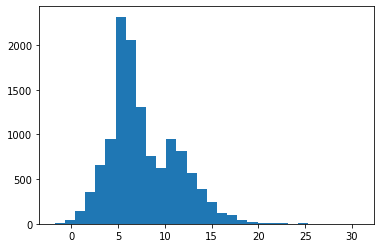

In [10]:
plt.hist(data, bins=30);

# Centrality

### Mean(Average)

In [11]:
def get_mean(xs):
    summed=0
    for x in xs:
        summed += x
    return summed / len(xs)

In [12]:
get_mean([3,5,2,6])

4.0

In [13]:
mean = np.mean(data)
print(mean, data.mean(), np.average(data))

7.68805056 7.68805056 7.68805056


### Median

In [14]:
xs = [7,7,3,1,4,5]

In [15]:
sorted(xs)

[1, 3, 4, 5, 7, 7]

In [16]:
mid = len(xs) // 2
mid

3

In [17]:
def get_median(xs):
    mid = len(xs) // 2
    if len(xs) % 2 == 1:
        return sorted(xs)[mid]
    else:
        return np.sum(sorted(xs)[mid - 1: mid + 1]) / 2

In [18]:
get_median([7,7,3,1,4,5])

4.5

In [19]:
median = np.median(data)
median

6.7325

In [20]:
outlier = np.insert(data,0,5000)
outlier

array([5000.   ,    5.844,    9.886, ...,    6.564,   11.343,    5.223])

In [21]:
outlier.shape

(12501,)

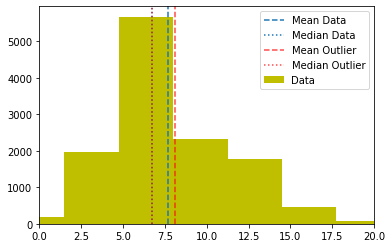

In [22]:
outlier = np.insert(data,0,5000)
plt.hist(data,label='Data', color='y')
plt.axvline(np.mean(data), ls='--', label='Mean Data')
plt.axvline(np.median(data), ls=':', label='Median Data')
plt.axvline(np.mean(outlier), ls='--', c='r', label='Mean Outlier', alpha=0.7)
plt.axvline(np.median(outlier), ls=':', c='r', label='Median Outlier', alpha=0.7)
plt.legend()
plt.xlim(0,20)
plt.show()

In [23]:
plt.rcParams['figure.figsize'] = 10,6

## Mode

In [24]:
xs=[1,7,2,5,3,3,8,3,2]

In [25]:
values, count = np.unique(xs, return_counts=True)

In [26]:
values

array([1, 2, 3, 5, 7, 8])

In [27]:
count

array([1, 2, 3, 1, 1, 1], dtype=int64)

In [28]:
max_count_index = np.argmax(count)
max_count_index

2

In [29]:
def get_mode(xs):
    values, count = np.unique(xs, return_counts=True)
    max_count_index = np.argmax(count)
    return values[max_count_index]    

In [30]:
get_mode([1,7,2,5,3,3,8,3,2])

3

In [31]:
mode = st.mode(data)
print(mode)

ModeResult(mode=array([5.519]), count=array([9]))


In [51]:
hist, edge = np.histogram(data, bins=30)

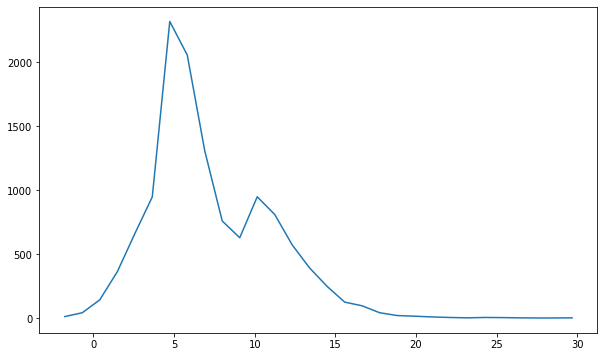

In [52]:
plt.plot(edge[:-1], hist);

In [53]:
print(hist)      #gives the number of samples which falls in each bins(30 bins here)
hist.shape

[  11   41  142  361  658  946 2317 2055 1306  758  627  947  809  571
  390  246  124   95   41   19   14    8    4    1    4    3    1    0
    0    1]


(30,)

In [54]:
print(edge)   #gives the edges of those 30 bins
edge.shape

[-1.771      -0.68663333  0.39773333  1.4821      2.56646667  3.65083333
  4.7352      5.81956667  6.90393333  7.9883      9.07266667 10.15703333
 11.2414     12.32576667 13.41013333 14.4945     15.57886667 16.66323333
 17.7476     18.83196667 19.91633333 21.0007     22.08506667 23.16943333
 24.2538     25.33816667 26.42253333 27.5069     28.59126667 29.67563333
 30.76      ]


(31,)

In [55]:
edge[1:]

array([-0.68663333,  0.39773333,  1.4821    ,  2.56646667,  3.65083333,
        4.7352    ,  5.81956667,  6.90393333,  7.9883    ,  9.07266667,
       10.15703333, 11.2414    , 12.32576667, 13.41013333, 14.4945    ,
       15.57886667, 16.66323333, 17.7476    , 18.83196667, 19.91633333,
       21.0007    , 22.08506667, 23.16943333, 24.2538    , 25.33816667,
       26.42253333, 27.5069    , 28.59126667, 29.67563333, 30.76      ])

In [56]:
edge[:-1]

array([-1.771     , -0.68663333,  0.39773333,  1.4821    ,  2.56646667,
        3.65083333,  4.7352    ,  5.81956667,  6.90393333,  7.9883    ,
        9.07266667, 10.15703333, 11.2414    , 12.32576667, 13.41013333,
       14.4945    , 15.57886667, 16.66323333, 17.7476    , 18.83196667,
       19.91633333, 21.0007    , 22.08506667, 23.16943333, 24.2538    ,
       25.33816667, 26.42253333, 27.5069    , 28.59126667, 29.67563333])

In [57]:
edge_center = (edge[1:] + edge[:-1]) / 2    #adding consecutive bin edges and dividing them by 2 will give edge center

In [58]:
print(edge_center)
edge_center.shape

[-1.22881667 -0.14445     0.93991667  2.02428333  3.10865     4.19301667
  5.27738333  6.36175     7.44611667  8.53048333  9.61485    10.69921667
 11.78358333 12.86795    13.95231667 15.03668333 16.12105    17.20541667
 18.28978333 19.37415    20.45851667 21.54288333 22.62725    23.71161667
 24.79598333 25.88035    26.96471667 28.04908333 29.13345    30.21781667]


(30,)

In [59]:
hist.argmax()

6

In [60]:
mode = edge_center[hist.argmax()]    #edge center where the maximum value of hist lies 
print(mode)

5.277383333333333


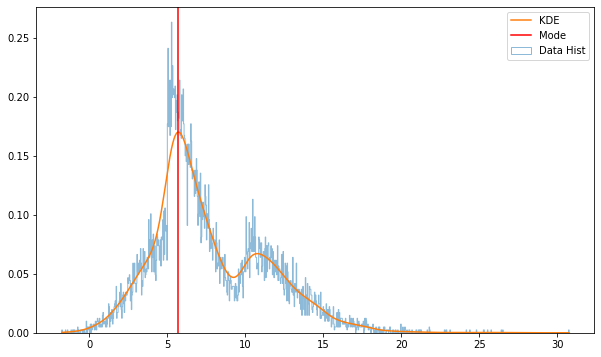

In [70]:
kde = st.gaussian_kde(data)
xvals = np.linspace(data.min(), data.max(), 10000)
yvals = kde(xvals)
mode = xvals[yvals.argmax()]
plt.hist(data, bins=1000, density=True, label='Data Hist', histtype='step', alpha=0.5)
plt.plot(xvals, yvals, label='KDE')
plt.axvline(mode, label='Mode',color='r')
plt.legend();

In [67]:
kde

In [65]:
yvals

array([3.44333925e-04, 3.46472869e-04, 3.48620111e-04, ...,
       5.80888979e-05, 5.80919537e-05, 5.80929723e-05])

In [66]:
xvals

array([-1.771     , -1.76774657, -1.76449315, ..., 30.75349315,
       30.75674657, 30.76      ])

## Comparision

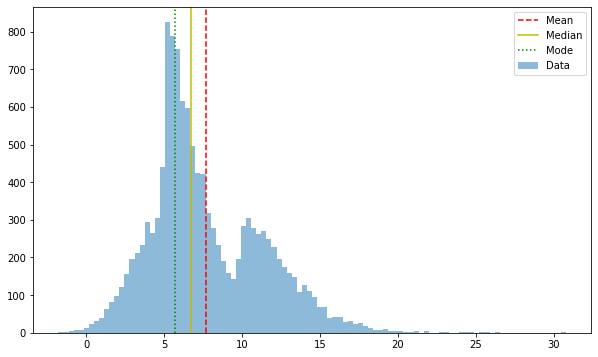

In [64]:
plt.hist(data, bins=100, label='Data', alpha=0.5)
plt.axvline(mean, label='Mean', ls='--', color='r')
plt.axvline(median, label='Median', ls='-', color='y')
plt.axvline(mode, label='Mode', ls=':', color='g')
plt.legend();